In [1]:
from langgraph.graph import StateGraph,START,END
from typing import TypedDict
from langchain_openai import ChatOpenAI
from langchain.prompts import PromptTemplate
from dotenv import load_dotenv
load_dotenv()



True

In [2]:
class Essay_analyzer(TypedDict):
    title: str
    essay: str
    cot:str
    doa:str
    col:str
    summarry:str
    

    

In [3]:
graph=StateGraph(Essay_analyzer)
model=ChatOpenAI()

In [4]:
def title(state:Essay_analyzer)->Essay_analyzer:
    # prompt=f"you are expert in genrating and providing random Title to student who is preparing for UPSC exam. "
    t1=f"i am giving you a title {state['title']}"
    state["title"]=t1
    return {"title":t1}

In [5]:
def essay(state:Essay_analyzer)->Essay_analyzer:
    essay_content=f"write an essay on given topic {state['title']}"
    state["essay"]=essay_content
    return state

In [6]:
def cot(state:Essay_analyzer)->Essay_analyzer:
    prompt2=f"""i am providing you topics of essay which is {state['title']} and  essay which is   {state['essay']} you are expert in analyzing the essay 
     specially in aspect of clarity of thought and provide the analysis in simple text with Score  between 0 to 10 where 0 is bad
      score and 10 is perfect score"""
    cot_var=model.invoke(prompt2).content
    return {"cot":cot_var}

In [7]:
def doa(state:Essay_analyzer)->Essay_analyzer:
    prompt3=f"""i am providing you topics of essay which is {state['title']} and  essay which is   {state['essay']} you are expert in analyzing the essay 
     specially in aspect of depth of analysis and provide the analysis in simple text with Score  between 0 to 10
      where 0 is bad score and 10 is perfect score"""
    doa_var=model.invoke(prompt3).content
    return {"doa":doa_var}

In [8]:
def col(state:Essay_analyzer)->Essay_analyzer:
    prompt4=f"""i am providing you topics of essay which is {state['title']} and  essay which is   {state['essay']} you are expert in analyzing the essay  specially in aspect of command on langguage 
    and provide the analysis in simple text with Score  between
    0 to 10 where 0 is bad score and 10 is perfect score"""
    col_var=model.invoke(prompt4).content
    return {"col":col_var}

In [9]:
def summarry(state:Essay_analyzer)->Essay_analyzer:
    prompt5=f"""i am providing you analysis of an essay {state['essay']}on three category. first is {state['cot']} second is {state['doa']} third is {state['col']}] 
    i want you to summarize this all evaluation text 
    and give me summary with average score of all three category"""
    summary_var=model.invoke(prompt5).content
    return {"summarry":summary_var}

In [10]:
#add node
graph.add_node("title",title)
graph.add_node("essay",essay)
graph.add_node("cot",cot)
graph.add_node("doa",doa)
graph.add_node("col",col)
graph.add_node("summarry",summarry)
#add edge
graph.add_edge(START,"title")
graph.add_edge("title","essay")
graph.add_edge("essay","cot")
graph.add_edge("essay","doa")
graph.add_edge("essay","col")
graph.add_edge("col","summarry")
graph.add_edge("doa","summarry")
graph.add_edge("cot","summarry")
graph.add_edge("summarry",END)



In [11]:
#compile
workflow=graph.compile()
#invoke
initial_state={
    "title": "Fundamental Rights",
    "essay": """The Constitution of India enshrines Fundamental Rights for its citizens in Part III of the Constitution. These rights, referred to as the "Magna Carta of India," are categorised into six groups - Right to Equality, Right to Freedom, Right against Exploitation, Right to Freedom of Religion, Right to Cultural and Educational Rights, and Constitutional Remedies. Inspired by the Bill of Rights of the American Constitution, these legally enforceable rights safeguard individual liberties and provide freedoms against the state's authoritarian rule, serving as the foundation for India's democratic system. Indian judiciary protects these Fundamental Rights if there is a violation of these rights by executive as well as legislative actions. Moreover, the Fundamental rights are referred to as the “Conscience of the Constitution”.

Features of Fundamental Rights
Fundamental rights are the minimum basic requirements constitutionally guaranteed by the state. Some of the features of fundamental rights as enshrined in the Indian Constitution are as follows:

Inspiration:
The American Bill of Rights and the French Declaration of the Rights of Man and the Citizen heavily influenced the incorporation of Fundamental Rights in the Indian Constitution.
The ideas of European political thinkers like John Locke, Rousseau, and Montesquieu, who advocated for individual liberties and natural rights, also inspired the Fundamental Rights.
Justiciable and enforceable: Citizens can move the Supreme Court and other courts for the enforcement of Fundamental Rights. There are two different mechanisms for the enforcement of Fundamental Rights:
Judicial Review: The court's power to review public sector bodies' actions in terms of legal and constitutional appropriateness.
Article 13 explicitly provides for the doctrine of judicial review by stating that all laws that are inconsistent with or in derogation of any of the fundamental rights shall be void
Writs: Orders issued by higher courts to lower courts or a public authority commanding the performance of a particular act. Both these remedies operate through Article 32.
Applicability: Some of the Fundamental Rights are available only to the citizens (Articles 15, 16, 19, 29 and 30), while others are available to all persons, whether citizens, foreigners or legal persons like corporations or companies.
Meaning of the state: Article 12 of Part III of the Indian Constitution defines the term "state" for the Constitution.
It includes the Government and Parliament of India, State governments, local authorities, and other authorities, such as statutory and non-statutory bodies.
Six Fundamental Rights of the Indian Constitution
The original Constitution of 1950 included seven Fundamental Rights. However, the 44th Constitutional Amendment in 1978 reduced this number to six by removing the Right to Property (Article 31).

Right to Equality (Article 14 -18)
The Right to Equality ensures that all individuals, irrespective of their background, have equal rights and opportunities to develop their skills, and talents, and pursue their ambitions.

Equality before law (Article 14): This article guarantees that the state shall not deny any person equality before the law and the equal protection of the laws within India.
This article implies the supremacy of the rule of law, the principle of natural justice, the doctrine of Anti Arbitrariness, and the inclusion of both positive and negative rights.
Prohibition of discrimination on certain grounds (Article 15): The state cannot discriminate against citizens based on their religion, race, caste, sex, or place of birth. It ensures that no citizen shall be subjected to any disability, liability, or restriction on these grounds.
Every Indian citizen has equal access to shops, restaurants, public entertainment venues, and the use of wells, tanks, and roads.
However, the state can make special provisions (affirmative actions) or concessions for women and children.
Equality of opportunity in public employment (Article 16): This article guarantees equal opportunity for all citizens in public employment.
It prohibits discrimination against a citizen in respect of employment or office under the state based on religion, race, caste, descent, place of birth, residence, or any combination of these factors.
However, the state can make provisions for the reservation of appointments or posts in favour of vulnerable sections of society.
Abolition of untouchability (Article 17): This article abolishes untouchability in any form.
It recognises untouchability as a social evil and ensures the eradication of this discriminatory practice in Indian society.
Abolition of titles (Article 18): This article states that no title other than military and academic distinction shall be conferred by the state.
Right to Freedom (Article 19-22)
Freedom of Speech and Expression (Article 19): This article guarantees six fundamental freedoms ((albeit with reasonable restrictions) to the citizens:
Speech and Expression
Peaceful assembly
Forming Associations/Unions
Free Movement throughout India
Freedom to reside and settle in any part of India
Freedom to practice any profession or carry on any occupation, trade, or business
Protection in Respect of Conviction for Offences (Article 20): This article provides four key safeguards to individuals:
Ex Post Facto Law: No person can be convicted for an act that was not considered an offence at the time it was committed.
Limit on Penalty: No person can be subjected to a penalty greater than what was prescribed by the law at the time the offence was committed.
Double Jeopardy: A person cannot be prosecuted and punished for the same offence more than once.
Self-Incrimination: No person can be compelled to be a witness against themselves. This protection ensures the right to silence and safeguards individuals from forced confessions.
Protection of life and personal liberty (Article 21): It says that no one can be deprived of his or her life or personal liberty except according to the procedure established by law.
This right includes various other rights such as the right to privacy,the Right to a clean environment etc.
Right to Education (Article 21A): It was added through the 86th Amendment to the Constitution in 2002. It entrusts the state to provide free and compulsory education to children aged six to fourteen in the manner determined by the state.
Protection Against Arrest and Detention in Certain Cases (Article 22): This article provides two key protections:
Protection at the time of arrest: The arrested person (but not enemy aliens or persons detained under preventive detention laws) should be informed of the grounds for arrest, allowed to consult and be defended by a legal practitioner of their choice, and presented before a magistrate within 24 hours. 
Right against Exploitation (Article 23 - 24)
Prohibition of traffic in human beings and forced labour (Article 23): It says that trafficking in human beings and beggars, as well as other forms of forced labour, is prohibited, and any violation of this provision is punishable by law.
Prohibition of employment of children in factories, etc. (Article 24): According to this Article no child under the age of fourteen shall be employed in a factory, mine, or hazardous occupation.
Child Labour (Prohibition & Regulation) Amendment Act, 2016 completely prohibits on employment or work of children below 14 years of age in all occupations and processes.
Right to Freedom of Religion (Article 25 - 28)
Freedom of conscience and free profession, practice and propagation of religion (Article 25): According to it, everyone has the right to free conscience and the freedom to freely profess, practise, and propagate religion.
However, this does not grant the right to forceful conversion. The State can impose restrictions on this right on the grounds of public order, morality and health.
Freedom to manage religious affairs (Article 26): Every religious group or section thereof shall have the right:
to establish and maintain institutions for religious and charitable purposes;
to manage its own religious affairs;
to own and acquire movable and immovable property; and
to administer such property in accordance with the law.
Freedom from taxation for the promotion of religion (Article 27): No one shall be compelled to pay any tax, the proceeds of which are specifically used to pay expenses incurred in the promotion or maintenance of any particular religion or religious sect.
Freedom from attending religious instruction (Article 28): It forbids religious instruction in any educational institution entirely supported by state funds unless such an institution, even if administered by the state, is established under an endowment or trust that requires it to be imparted.
Cultural and Educational Rights (Article 29 - 30)
Protection of interests of minorities (Article 29):
It gives any section of citizens residing in India's territory or any part of it with a distinct language, script, or culture the right to preserve it. (protects the right of a group)
No citizen shall be denied admission to or receive aid from a state-run educational institution based on religion, race, caste, language, or any of them. (protects the rights of individuals irrespective of community)
Right of minorities to establish and administer educational institutions (Article 30): All religious and linguistic minorities have the right to establish and administer educational institutions of their choice. Protection under it extends only to linguistic and religious and not any section of the citizens.
Right to Constitutional Remedies (Article 32)
It provides legal remedies for the protection of other fundamental rights. When any of the fundamental rights are violated, one can seek justice through the courts.





‹›
One can directly approach the Supreme Court under Article 32 (original jurisdiction of the Supreme Court), which empowers the courts to enforce Fundamental Rights through various writs such as habeas corpus, mandamus, prohibition, quo warranto, and certiorari.
The High Courts also have been conferred these powers under Article 226. Further, any other court may be authorised by Parliament to issue directives, orders, and writs of every description.
Exceptions to the Fundamental Rights
The conflict between the judiciary and legislature regarding Article 31 (Right to Property) and land reforms as well as Parliament’s power to amend fundamental rights led to several Constitutional Amendments including the insertion of Articles - 31A, 31B and 31C. 

Article 31: It was provided in the original Constitution as a Fundamental Right. The 44th Amendment Act of 1978 repealed it and made it a constitutional right under Article 300A.
Article 31A: It was introduced by the First Amendment Act, of 1951, to protect five categories of laws (related to land reforms) from being challenged on the grounds of violating Article 14 and Article 19. 
These laws relate to the state’s power to acquire estates, manage properties, amalgamate corporations, and modify the rights of directors, shareholders, and mining leases.
Article 31B: The First Amendment Act also inserted Article 31B which created the  Ninth Schedule to safeguard the acts and regulations from being challenged on the grounds of violating any fundamental rights.
Its scope is wider than Article 31A as it immunises any law in the Ninth Schedule from the Fundamental Rights.
Article 31C: Inserted by the 25th Amendment Act, 1971, it states that no law implementing socialistic directive principles specified in Articles 39 (b) and (c) shall be declared void on the grounds of violating Article 14 or Article 19.
I.R. Coelho case (2007): In this case, the Supreme Court ruled that laws under the Ninth Schedule but made after April 24, 1973 (Kesavananda Bharati case) could be scrutinised if they violated Fundamental Rights or the basic structure of the Constitution.
Other Provisions
Article 33: This article empowers the Parliament to restrict or abrogate the fundamental rights of the members of the armed forces, paramilitary forces, police forces, intelligence agencies and analogous forces.
Article 34: It allows for exceptions to fundamental rights during the imposition of martial law, enabling Parliament to pass laws to indemnify individuals and validate actions taken in the context of maintaining or restoring order in areas where martial law is enforced.
Article 35: This provision states that Parliament has the power to make laws regarding certain matters specified in Article 16 (3), Article 32 (3), Article 33, and Article 34""",
    
}
#result

In [12]:
final_state=workflow.invoke(initial_state)
print(final_state)


{'title': 'i am giving you a title Fundamental Rights', 'essay': 'write an essay on given topic i am giving you a title Fundamental Rights', 'cot': 'Based on the title "Fundamental Rights," this essay should focus on the importance and implications of fundamental rights in society. It is important to discuss how fundamental rights ensure the protection and empowerment of individuals, and the role they play in promoting equality and justice.\n\nClarity of thought is vital in this essay to effectively convey the significance of fundamental rights and their impact on society. The essay should be well-structured, with clear and coherent arguments that support the thesis statement.\n\nIn analyzing the essay, it is crucial to consider whether the author effectively communicates the reasons why fundamental rights are essential, and provides relevant examples to illustrate their importance. Additionally, the essay should also address any potential challenges or limitations associated with the 

In [15]:
print(final_state['summarry'])

The evaluation of the essay on Fundamental Rights focused on analyzing the clarity of thought, structure, argument development, examples and evidence, and conclusion. The average scores for the three evaluations were as follows:

- Clarity of thought: 8/10
- Structure: 7/10
- Argument development: 8/10
- Examples and evidence: 7/10
- Conclusion: 7/10

Overall, the essay was noted for its clear and insightful analysis of fundamental rights, with room for improvement in the use of examples and a stronger conclusion. The average score for the three evaluations was approximately 7.4 out of 10.


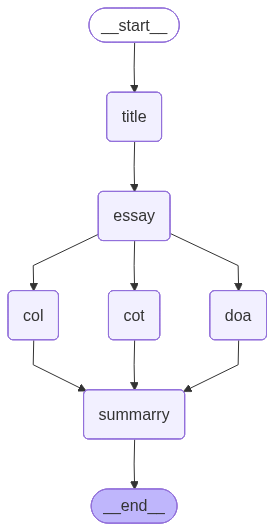

In [13]:
from IPython.display import Image
Image(workflow.get_graph().draw_mermaid_png())